# Определение перспективного тарифа для телекоммуникационной компании.

Целью проекта является анализ тарифов мобильной связи компании на выборке из 500 пользователей за год. На основе полученных данных сформулируем плюсы и минусы тарифов, а также составим рекомендации по тому, какой тариф лучше продвигать компании. 

## Содержание
1. [Изучение данных.](#paragraph1)
2. [Подготовка данных.](#paragraph2)
3. [Расчет данных.](#paragraph3)
4. [Анализ данных.](#paragraph4)
5. [Проверка гипотез.](#paragraph5)
6. [Общий вывод.](#paragraph6)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
import math

In [2]:
warnings.filterwarnings("ignore")

## Изучение данных. <a name="paragraph1"></a>

In [3]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except FileNotFoundError:
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')

In [4]:
list_of_data = [calls, internet, messages, users]

In [5]:
for i in list_of_data:
    display(i.info())
    display(i.head())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## Подготовка данных. <a name="paragraph2"></a>

Заменим в каждом датафрейме формат столбца с датой на формат date_time.

In [6]:
for df in list_of_data:
    for column in df.columns:
        if "date" in column:
            df[column] = pd.to_datetime(df[column], format='%Y.%m.%d')

In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Посмотрим на нулевые звонки и их долю.

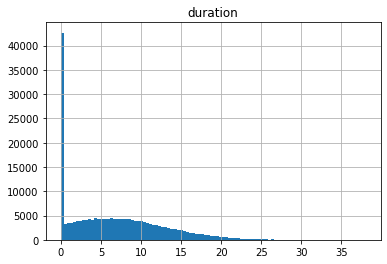

In [8]:
calls.hist('duration', bins=100)
plt.show()

In [9]:
zero_calls = calls['duration'][calls['duration'] == 0].count()
part_of_zero_calls = zero_calls / len(calls)
print('Количество звонков с нулевой длительностью', '{:.0%}'.format(part_of_zero_calls))

Количество звонков с нулевой длительностью 20%


Поскольку в обоих тарифах тарификация начинается от начала звонка, то все зафиксированные системой нулевые звонки - это микрозвонки на милисекунды, которые тоже тарифицируются. 
Заменим все нули на единицы, чтобы эти данные не пропали из анализа. 

In [10]:
calls.loc[calls['duration'] == 0, 'duration'] = 1

Далее по тем же причинам округления в тарификации, округлим нецелые значения в большую сторону. 

In [11]:
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))
internet['mb_used'] = internet['mb_used'].apply(lambda x: math.ceil(x))

Округлили в большую сторону данные по длительности звонков и трафику и одновременно сменили тип на int.

In [12]:
calls.info() #проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


## Расчет показателей. <a name="paragraph3"></a>

Рассчитаем данные.
Создадим столбец с месяцами.

In [13]:
list_of_data = [calls, internet, messages]
for data in list_of_data:
    for column in data:
        if "date" in column:
            data['month'] = data[column].dt.month

Для датафрейма с пользователями создадим столбец с месяцем регистрации и месяцем смены тарифа.

In [14]:
users['month_reg'] = users['reg_date'].dt.month
users['churn_month'] = users['churn_date'].dt.month

Заменим пустые значение в месяце завершения пользования тарифом на декабрь (12). Это поможет впоследствии задавать интервалы использования тарифа корректно. 

In [15]:
users['churn_month'] = users['churn_month'].fillna(12)

Подсчитаем количество и длительность звонков по месяцам.

In [16]:
calls_by_user = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count','sum']).reset_index()
calls_by_user.columns

MultiIndex([('user_id',         ''),
            (  'month',         ''),
            (  'count', 'duration'),
            (    'sum', 'duration')],
           )

In [17]:
calls_by_user.columns = ['user_id','month','count_of_calls','minutes']
calls_by_user

,user_id,month,count_of_calls,minutes
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,418
4,1000,9,58,478
...,...,...,...,...
3169,1498,10,41,258
3170,1499,9,9,71
3171,1499,10,68,473
3172,1499,11,74,624


Подсчитаем израсходованный трафик и количество сообщений по месяцам

In [18]:
internet_by_user = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()
internet_by_user.columns = ['user_id','month', 'sum_mb_used']

In [19]:
messages_by_user = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count').reset_index()
messages_by_user.columns = ['user_id','month', 'count_of_sms']

Соединим все данные в единый датафрейм с именами пользователей.

Сначала размножим все данные по пользователям на 12 месяцев.

In [20]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
months_df = pd.DataFrame(data = months, columns = ['month'])  
months_df['key'] = 1
months_df

,month,key
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [21]:
users['key'] = 1
users_month = pd.merge(users, months_df, on ='key').drop("key", 1)
users_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      6000 non-null   int64         
 1   age          6000 non-null   int64         
 2   churn_date   456 non-null    datetime64[ns]
 3   city         6000 non-null   object        
 4   first_name   6000 non-null   object        
 5   last_name    6000 non-null   object        
 6   reg_date     6000 non-null   datetime64[ns]
 7   tariff       6000 non-null   object        
 8   month_reg    6000 non-null   int64         
 9   churn_month  6000 non-null   float64       
 10  month        6000 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 562.5+ KB


500 пользователей по 12 месяцев = 6000 записей. Все сошлось. Соединим с таблицами по звонкам, сообщениям, трафику.

In [22]:
draft_data1 = users_month.merge(messages_by_user, on=['user_id','month'], how = 'left')

In [23]:
draft_data2 = draft_data1.merge(internet_by_user, on=['user_id','month'], how = 'outer')

In [24]:
draft_data3 = draft_data2.merge(calls_by_user, on=['user_id','month'], how = 'outer')

In [25]:
draft_data3.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg,churn_month,month,count_of_sms,sum_mb_used,count_of_calls,minutes
1693,1141,52,NaT,Москва,Клариса,Короткова,2018-12-02,smart,12,12.0,2,NaN,NaN,NaN,NaN
2943,1245,32,NaT,Москва,Маргарита,Коновалова,2018-09-10,ultra,9,12.0,4,NaN,NaN,NaN,NaN
227,1018,71,NaT,Уфа,Матвей,Золотов,2018-04-01,ultra,4,12.0,12,37.0,5430.0,110.0,853.0
1740,1145,45,NaT,Тюмень,Юлий,Алешин,2018-04-11,smart,4,12.0,1,NaN,NaN,NaN,NaN
2876,1239,68,NaT,Самара,Даниил,Ёрохов,2018-06-12,smart,6,12.0,9,29.0,12003.0,71.0,477.0


Рассчитаем помесячную выручку. 

In [26]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

In [27]:
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']

In [28]:
draft_data4 = draft_data3.merge(tariffs, on='tariff', how = 'outer')

Выручка за сообщения.

In [29]:
def get_profit_sms(row):
    if row['messages_included'] < row['count_of_sms']:
        return (row['count_of_sms'] - row['messages_included']) * row['rub_per_message']
    return 0
draft_data4['profit_sms'] = draft_data4.apply(get_profit_sms, axis=1)

Выручка за минуты.

In [30]:
def get_profit_minutes(row):
    if row['minutes_included'] < row['minutes']:
        return (row['minutes'] - row['minutes_included']) * row['rub_per_minute']
    return 0
draft_data4['profit_minutes'] = draft_data4.apply(get_profit_minutes, axis=1)

Выручка за интернет. Т.к. пакеты дополнительного интернета выдаются гигабайтами, делим перерасход на 1024 и округляем в большую сторону.

In [31]:
def get_profit_internet(row):
    if row['mb_per_month_included'] < row['sum_mb_used']:
        return (math.ceil((row['sum_mb_used'] - row['mb_per_month_included']) / 1024)) * row['rub_per_gb']
    return 0
draft_data4['profit_internet'] = draft_data4.apply(get_profit_internet, axis=1)

Месяцы пользования тарифом. Благодаря тому, что пустые месяцы завершения пользования тарифом ранее заменили на 12, сработает функция ниже.

In [32]:
def get_profit_monthly_fee(row):
    if (row['month_reg'] <= row['month'] and row['month'] <= row['churn_month']):
        return row['rub_monthly_fee']
    return 0
draft_data4['profit_monthly_fee'] = draft_data4.apply(get_profit_monthly_fee, axis=1)

In [33]:
draft_data4['total_profit'] = draft_data4['profit_sms'] + draft_data4['profit_minutes'] + draft_data4['profit_internet'] + draft_data4['profit_monthly_fee']

In [34]:
final_data = draft_data4.drop(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis='columns')

In [35]:
final_data.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg,churn_month,month,count_of_sms,sum_mb_used,count_of_calls,minutes,profit_sms,profit_minutes,profit_internet,profit_monthly_fee,total_profit
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,1,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,2,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,3,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,4,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12.0,5,22.0,2256.0,22.0,164.0,0.0,0.0,0,1950,1950.0


Завершена подготовка данных. Теперь есть информация по расходам на все виды связи по месяцам для каждого пользователя выборки.

## Анализ данных. <a name="paragraph4"></a>

Опишем поведение клиентов оператора, исходя из выборки.

Среднее количество используемых минут, смс, трафика по тарифам.

In [36]:
final_data.pivot_table(index='tariff', values=['count_of_sms','sum_mb_used', 'minutes'])

,count_of_sms,minutes,sum_mb_used
tariff,,,
smart,38.716441,430.609987,16236.472621
ultra,61.161006,560.113565,19686.767179


Средние значения показывают что в среднем пользователи ultra укладываются во все свои пакеты, а у smart перерасходы по минутам и интернет-трафику.

Рассчитаем разброс данных. 

In [37]:
variance_sms_smart = np.var(final_data.query('tariff == "smart"')['count_of_sms'], ddof=1)
variance_sms_ultra = np.var(final_data.query('tariff == "ultra"')['count_of_sms'], ddof=1)
variance_mb_smart = np.var(final_data.query('tariff == "smart"')['sum_mb_used'], ddof=1)
variance_mb_ultra = np.var(final_data.query('tariff == "ultra"')['sum_mb_used'], ddof=1)
variance_calls_smart = np.var(final_data.query('tariff == "smart"')['minutes'], ddof=1)
variance_calls_ultra = np.var(final_data.query('tariff == "ultra"')['minutes'], ddof=1)

list_of_variance = [variance_sms_smart, variance_sms_ultra, variance_mb_smart, variance_mb_ultra, variance_calls_smart, variance_calls_ultra]
print('Дисперсия количества смс в тарифе смарт', variance_sms_smart)
print('Дисперсия количества смс в тарифе ультра', variance_sms_ultra)
print('Дисперсия количества мегабайт в тарифе смарт', variance_mb_smart)
print('Дисперсия количества мегабайт в тарифе ультра', variance_mb_ultra)
print('Дисперсия количества минут в тарифе смарт', variance_calls_smart)
print('Дисперсия количества минут в тарифе ультра', variance_calls_ultra)

Дисперсия количества смс в тарифе смарт 717.5942011753548
Дисперсия количества смс в тарифе ультра 2109.6591828651995
Дисперсия количества мегабайт в тарифе смарт 34443100.68133359
Дисперсия количества мегабайт в тарифе ультра 99043439.6079566
Дисперсия количества минут в тарифе смарт 37577.96708294311
Дисперсия количества минут в тарифе ультра 99062.63340527976


Выведем стандартные отклонения по показателям.

In [39]:
for var in list_of_variance:
    print(np.sqrt(var))

26.787948804926344
45.93102636416042
5868.824471845583
9952.057054094726
193.85037292443653
314.74216972830277


In [40]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Посмотрим на распределения с помощью гистограмм.

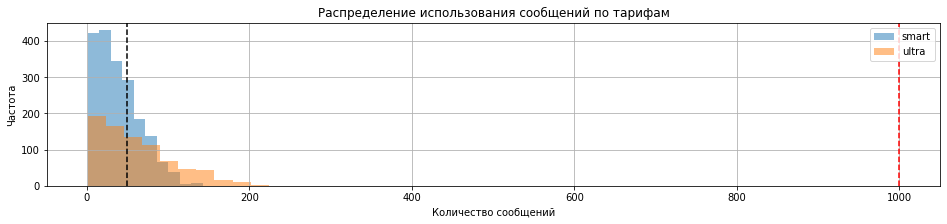

In [41]:
final_data.query('tariff == "smart"')['count_of_sms'].plot(kind = 'hist', alpha=0.5, label='smart', grid=True, figsize=(16,3))
final_data.query('tariff == "ultra"')['count_of_sms'].plot(kind = 'hist', alpha=0.5, label='ultra', grid=True, figsize=(16,3))

plt.axvline(x=50, color='k', linestyle='dashed')
plt.axvline(x=1000, color='r', linestyle='dashed')
plt.legend(loc='upper right')
plt.ylabel('Частота')
plt.xlabel('Количество сообщений')
plt.title('Распределение использования сообщений по тарифам')
plt.show()

In [42]:
smart_count_sms_over_limit = final_data[(final_data['tariff'] == "smart")&(final_data['count_of_sms']>50)]['user_id'].count()
smart_count_of_sms = final_data[final_data['tariff'] == "smart"]['count_of_sms'].count()
part_of_sms_over_limit = smart_count_sms_over_limit / smart_count_of_sms
print('Доля абонентов в тарифе Смарт c перерасходом по сообщениям', '{:.0%}'.format(part_of_sms_over_limit))

Доля абонентов в тарифе Смарт c перерасходом по сообщениям 29%


Распределение использования сообщений по тарифам демострирует, что на тарифе smart частота отправки до 80 сообщений выше, чем на ultra. С увеличением количеcтва отправленных сообщений, преимущество появляется у тарифа ultra.
И на smart и ultra чаще отправляют меньшее количество сообщений.
На ultra пользователи всегда уладываются в пакет и не переплачивают, нежели на smart.


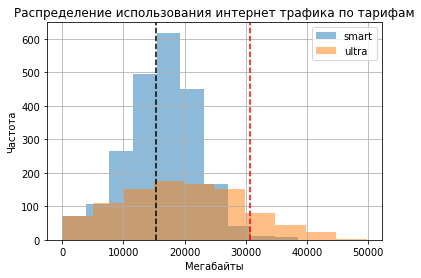

In [43]:
final_data.query('tariff == "smart"')['sum_mb_used'].plot(kind = 'hist', alpha=0.5, label='smart', grid=True)
final_data.query('tariff == "ultra"')['sum_mb_used'].plot(kind = 'hist', alpha=0.5, label='ultra', grid=True)
plt.axvline(x=15360, color='k', linestyle='dashed')
plt.axvline(x=30720, color='r', linestyle='dashed')
plt.legend(loc='upper right')
plt.ylabel('Частота')
plt.xlabel('Мегабайты')
plt.title('Распределение использования интернет трафика по тарифам')
plt.show()

In [44]:
smart_count_mb_over_limit = final_data[(final_data['tariff'] == "smart")&(final_data['sum_mb_used']>15360)]['sum_mb_used'].count()
smart_count_of_mb = final_data[final_data['tariff'] == "smart"]['sum_mb_used'].count()
smart_part_of_mb_over_limit = smart_count_mb_over_limit / smart_count_of_mb

ultra_count_mb_over_limit = final_data[(final_data['tariff'] == "ultra")&(final_data['sum_mb_used']>30720)]['sum_mb_used'].count()
ultra_count_of_mb = final_data[final_data['tariff'] == "ultra"]['sum_mb_used'].count()
ultra_part_of_mb_over_limit = ultra_count_mb_over_limit / ultra_count_of_mb

print('Доля абонентов в тарифе Смарт c перерасходом по интернет трафику', '{:.0%}'.format(smart_part_of_mb_over_limit))
print('Доля абонентов в тарифе Ультра c перерасходом по интернет трафику', '{:.0%}'.format(ultra_part_of_mb_over_limit))

Доля абонентов в тарифе Смарт c перерасходом по интернет трафику 59%
Доля абонентов в тарифе Ультра c перерасходом по интернет трафику 14%


На обеих гистограммах видим нормальное распределение использования трафика. На smart наиболее высокая частота до 20000 Мб. Часть пользователей не укладываются в пакет 15Гб. На ultra пользователи лучше укладываются в пакет 30Гб.

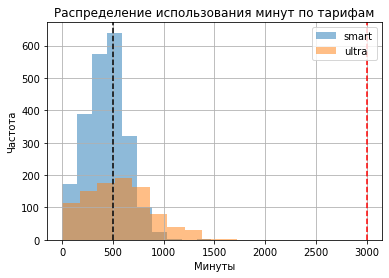

In [45]:
final_data.query('tariff == "smart"')['minutes'].plot(kind = 'hist', alpha=0.5, label='smart', grid=True)
final_data.query('tariff == "ultra"')['minutes'].plot(kind = 'hist', alpha=0.5, label='ultra', grid=True)
plt.axvline(x=500, color='k', linestyle='dashed')
plt.axvline(x=3000, color='r', linestyle='dashed')
plt.legend(loc='upper right')
plt.ylabel('Частота')
plt.xlabel('Минуты')
plt.title('Распределение использования минут по тарифам')
plt.show()

In [46]:
smart_count_mins_over_limit = final_data[(final_data['tariff'] == "smart")&(final_data['minutes']>500)]['user_id'].count()
smart_count_of_mins = final_data[final_data['tariff'] == "smart"]['minutes'].count()
part_of_mins_over_limit = smart_count_mins_over_limit / smart_count_of_mins
print('Доля абонентов в тарифе Смарт c перерасходом по минутам', '{:.0%}'.format(part_of_mins_over_limit))

Доля абонентов в тарифе Смарт c перерасходом по минутам 36%


В распределении минут похожая картина. Очень большая часть людей на тарифе smart имеет перерасход по минутам. Наибольшая частота около 500 минут, в то время как в пакете всего 300. Пользователи на ultra укладываются всегда.

#### Вывод.

На построенных гистограммах по распределению использования пакетов в тарифах наглядно отражено поведение пользователей.

В распредлении использования пакета сообщений абоненты тарифа Ультра всегда уклыдваются в свой лимит, а среди абонентов Смарта 29% имеют перерасход. Наиболее частые показатели сконцентрированы у минимальных значений. Данное распределение похоже на распределение Пуассона. 

Распределение использования пакета интернета близко к нормальному, то есть наиболее частые значения сконцентрированы вокруг среднего. У абонентов тарифа Ультра перерасход наблюдается в 14% случаях, а среди абонентов Смарта целых 59% имеют перерасход! 

Распределение использования пакета минут также близко к нормальному. Но выходят за лимит только пользователи Смарта - у них это происходит в 36% случаях. Среди абонентов Ультра перерасхода нет.

Исходя из этого, можем предположить, что тариф Смарт может быть более выгоден компании за счет большой доли перерасходов по всем показателям. Проверим нашу гипотезу.


## Проверка гипотез. <a name="paragraph5"></a>

#### Проверим гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

**H0** = равенство средней выручки пользователей тарифов «Ультра» и «Смарт»

**H1** = различие средней выручки пользователей тарифов «Ультра» и «Смарт»

Выведем среднюю выручку по тарифам. В столбце с выручкой много нулевых значений из-за того, что пользователи подключались к тарифу или отключались от него посреди года. Учитываются при расчете среднего и сильно искажают его. Чтобы среднее было более точным, избавимся от нулей.

In [47]:
final_data.loc[final_data['total_profit'] == 0, 'total_profit'] = np.nan

In [48]:
final_data.pivot_table(index='tariff', values=['total_profit'])

,total_profit
tariff,
smart,1311.273543
ultra,2070.943205


Взглянем на дисперсии выручек по тарифам.

In [49]:
print(np.var(final_data.query('tariff == "smart"')['total_profit'], ddof=1))
print(np.var(final_data.query('tariff == "ultra"')['total_profit'], ddof=1))

688924.9157196112
143360.42925834784


Дисперсии далеки друг от друга, применим параметр equal_var = False

In [50]:
tariffs_results = st.ttest_ind(
final_data.query('tariff == "ultra"')['total_profit'],
final_data.query('tariff == "smart"')['total_profit'], equal_var = False, nan_policy="omit")
print('p-значение: ', tariffs_results.pvalue)

p-значение:  1.0342365508735644e-234


In [51]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
if (tariffs_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Гипотеза о равенстве выручки по тарифам отвергнута с помощью теста. 

#### Проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**H0** = равенство средней выручки по Москве и регионам.

**H1** = различие средней выручки по Москве и регионам.

In [52]:
print(np.var(final_data.query('city == "Москва"')['total_profit'], ddof=1))
print(np.var(final_data.query('city != "Москва"')['total_profit'], ddof=1))

568264.3968286335
662266.4884857491


In [53]:
city_results = st.ttest_ind(
final_data.query('city == "Москва"')['total_profit'],
final_data.query('city != "Москва"')['total_profit'], nan_policy="omit")
print('p-значение: ', city_results.pvalue)

p-значение:  0.5751470259855289


In [54]:
alpha = .05 
if (city_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Данные из выборки не противоречат нулевой гипотезе. 

## Общий вывод. <a name="paragraph6"></a>

Проанализировав предоставленную выборку о 500 пользователях сформулируем общие выводы. 

Во-первых было выяснено, что тариф Смарт популярнее тарифа Ультра в виду своей низкой цены по сравнению с другим.

Во-вторых, выведенные распределения использования сообщений, минут, мегабайт продемонстрировали что, на тарифе Смарт чаще происходят перерасходы пакетов, чем на Ультра. В случае со звонками и сообщениями - в Ультра пользователи всегда укладываются в пакеты, в Смарте же около трети пользователей выходит за лимит и тратит больше денег на доп. тарификацию.
В случае с интернет-трафиком на Смарте показатели перерасхода также очень высоки, около трети пользователей. В Ультра тоже есть перерасход, около пятой части всех пользователей выходят за лимит.

Исходя из полученных вводных выдвинули гипотезу о различии средней выручки по тарифам, поскольку стало заметно, что вероятно перерасходы приносят больше денег компании. И проверка показала, что в данных выборки нет противоречий гипотезе о различии в средних. 
Также проверили гипотезу о различии средней выручки от московских пользователей и региональных, но потверждения ей не нашлось. 

Делаем вывод, что компании приносит больше денег тариф "Смарт" за счет переплат по перерасходу лимитов и именно им стоит заняться. 
Разницы по выручке в регионах и Москве нет, поэтому выделять на это бюджет не стоит.

